In [1]:
import fastai
from fastai.tabular.all import *

In [2]:
fastai.__version__


'2.4.1'

In [3]:
path= untar_data(URLs.ADULT_SAMPLE)

In [4]:
dla= TabularDataLoaders.from_csv(path/'adult.csv', path= path, y_names= "salary", cat_names=['workclass','education','marital-status',
                                     'occupation','relationship','race'], cont_names=['age','fnlwgt','education-num'], procs=[Categorify,FillMissing,Normalize], device='cuda')

In [5]:
learn= tabular_learner(dla, metrics= accuracy)

In [6]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.469316,0.427571,0.819871,00:04
1,0.364980,0.367785,0.832617,00:03
2,0.359996,0.355277,0.837684,00:04
3,0.355340,0.351689,0.839220,00:04
4,0.360015,0.351709,0.840295,00:03
5,0.356258,0.347159,0.841523,00:04
6,0.349941,0.347638,0.840448,00:05
7,0.351347,0.345695,0.842905,00:04
8,0.341461,0.345265,0.846284,00:05
9,0.343074,0.345340,0.845823,00:04


In [7]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.357156,0.355206,0.829545,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.340884,0.346814,0.837838,00:05
1,0.355745,0.345587,0.841677,00:05
2,0.345964,0.351445,0.837684,00:04
3,0.344989,0.347749,0.838452,00:05
4,0.353793,0.351712,0.839988,00:05
5,0.344039,0.347345,0.842598,00:05
6,0.342434,0.348228,0.838298,00:05
7,0.325345,0.348679,0.839681,00:05
8,0.342494,0.349109,0.840448,00:05
9,0.342010,0.349210,0.840602,00:06


In [8]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,12.0,1.0,2.0,2.0,5.0,1.0,-0.777172,-0.053059,-0.422442,0.0,0.0
1,3.0,12.0,3.0,5.0,1.0,1.0,1.0,1.055850,-1.619605,-0.422442,0.0,0.0
2,5.0,13.0,3.0,14.0,1.0,5.0,1.0,0.395962,-0.739119,1.537902,1.0,1.0
3,5.0,12.0,3.0,13.0,1.0,5.0,1.0,-0.190605,-0.957695,-0.422442,0.0,0.0
4,5.0,16.0,3.0,12.0,1.0,5.0,1.0,1.422455,-0.856120,-0.030374,1.0,0.0
5,5.0,7.0,3.0,5.0,1.0,5.0,1.0,1.715739,-1.582801,-1.990718,0.0,0.0
6,7.0,13.0,1.0,13.0,5.0,5.0,1.0,0.175999,2.387982,1.537902,1.0,0.0
7,5.0,16.0,4.0,15.0,2.0,5.0,1.0,-0.483889,0.646701,-0.030374,0.0,0.0
8,5.0,12.0,1.0,0.0,2.0,5.0,2.0,-0.117284,0.491094,-0.030374,0.0,0.0


SuggestedLRs(valley=0.001737800776027143)

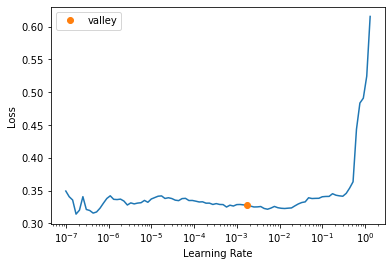

In [9]:
learn.lr_find()

In [10]:
learn.fit_one_cycle(10,.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.336000,0.350164,0.838913,00:03
1,0.356959,0.348743,0.839066,00:04
2,0.341753,0.349340,0.839066,00:05
3,0.342900,0.355367,0.834920,00:04
4,0.345703,0.353927,0.834767,00:05
5,0.322783,0.357712,0.836456,00:05
6,0.331154,0.356192,0.836302,00:05
7,0.330143,0.355027,0.837224,00:04
8,0.328964,0.354891,0.837224,00:06
9,0.315527,0.355596,0.838913,00:05


In [11]:
dls= dla.dataloaders(bs=32, device= 'cuda')

In [12]:
dls

In [13]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,7th-8th,Married-civ-spouse,Handlers-cleaners,Husband,White,False,44.000000,248248.998758,4.0,<50k
1,Private,Some-college,Married-civ-spouse,Sales,Wife,White,False,40.000000,220588.998687,10.0,>=50k
2,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,False,55.000001,477867.011014,13.0,>=50k
3,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,False,28.000000,264498.000582,13.0,<50k
4,State-gov,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,False,56.999999,254948.998207,9.0,>=50k
5,Local-gov,Masters,Never-married,Prof-specialty,Not-in-family,White,False,45.000000,167333.999692,14.0,>=50k
6,Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,False,43.000000,309932.001726,13.0,<50k
7,State-gov,Some-college,Divorced,Exec-managerial,Not-in-family,White,False,66.000000,71074.994891,10.0,<50k
8,Private,HS-grad,Never-married,Sales,Not-in-family,White,False,19.000000,82209.996485,9.0,<50k
9,Private,Bachelors,Divorced,Prof-specialty,Unmarried,White,False,42.000000,115178.001124,13.0,<50k


In [14]:
emb_szs = get_emb_sz(dla)

In [15]:
emb_szs

[(10, 6), (17, 8), (8, 5), (16, 8), (7, 5), (6, 4), (3, 3)]

In [87]:
from fast_tabnet.core import *
model = TabNetModel(emb_szs, len(dla.cont_names), dls.c, n_d=8, n_a=8, n_steps=5, mask_type='entmax');

In [91]:
learn1 = Learner(dla, model, CrossEntropyLossFlat(), opt_func=Adam, lr=3e-2, metrics=[accuracy])

SuggestedLRs(valley=0.0010000000474974513)

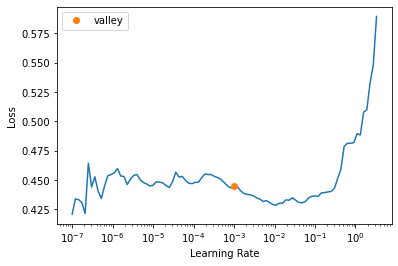

In [92]:
learn1.lr_find()


In [93]:
learn1.fit_one_cycle(5,.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.417472,0.414631,0.816646,00:21
1,0.412778,0.397661,0.818950,00:24
2,0.403987,0.390899,0.819103,00:23
3,0.407272,0.386175,0.823710,00:22
4,0.392943,0.388200,0.824478,00:25


In [102]:
def objective(n_d:Int, n_a:Int, n_steps:Int):
    model = TabNetModel(emb_szs, len(dla.cont_names), dls.c, n_d=n_d, n_a=n_a, n_steps=n_steps, gamma=1.5)
    learn1 = Learner(dla, model, CrossEntropyLossFlat(), opt_func=opt_func, lr=3e-2, metrics=[accuracy])
    learn1.fit_one_cycle(5)
    return float(learn1.validate[1])

In [136]:
import optuna

def objective(trial):
     
    
     n_d = trial.suggest_int('n_d', 0,8)
     n_a = trial.suggest_int('n_a', 0,8)
     n_steps= trial.suggest_int('n_steps', 1, 5)
        
     model = TabNetModel(emb_szs, len(dla.cont_names), dls.c, n_d=n_d, n_a=n_a, n_steps=n_steps, gamma=1.5)
     learn1 = Learner(dla, model, CrossEntropyLossFlat(), opt_func=Adam, lr=3e-2, metrics=[accuracy])
   
     learn1.fit_one_cycle(5)
     return float(learn1.validate()[1])


In [137]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-09-05 16:15:01,258] A new study created in memory with name: no-name-4fdaf748-d6c3-4ea8-b8d3-cbc738753f7d


epoch,train_loss,valid_loss,accuracy,time
0,0.425064,0.426060,0.775798,00:13
1,0.395566,0.392299,0.816493,00:15
2,0.390073,0.383452,0.820485,00:16
3,0.389137,0.385424,0.819717,00:17
4,0.379186,0.381942,0.820178,00:15


[I 2021-09-05 16:16:23,264] Trial 0 finished with value: 0.8201781511306763 and parameters: {'n_d': 2, 'n_a': 8, 'n_steps': 3}. Best is trial 0 with value: 0.8201781511306763.
C:\Users\Admin\anaconda3\lib\site-packages\torch\nn\init.py:388: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
C:\Users\Admin\anaconda3\lib\site-packages\pytorch_tabnet\tab_network.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  gain_value = np.sqrt((input_dim + output_dim) / np.sqrt(4 * input_dim))


epoch,train_loss,valid_loss,accuracy,time
0,0.693148,0.693147,0.765049,00:16
1,0.693146,0.693147,0.765049,00:16
2,0.693146,0.693147,0.765049,00:16
3,0.693146,0.693147,0.765049,00:17
4,0.693146,0.693147,0.765049,00:18


[I 2021-09-05 16:17:50,048] Trial 1 finished with value: 0.765049159526825 and parameters: {'n_d': 0, 'n_a': 4, 'n_steps': 3}. Best is trial 0 with value: 0.8201781511306763.


epoch,train_loss,valid_loss,accuracy,time
0,0.397760,0.394086,0.827088,00:13
1,0.389155,0.379744,0.824785,00:12
2,0.370424,0.356112,0.832770,00:12
3,0.358995,0.347846,0.841370,00:11
4,0.344737,0.347951,0.840448,00:11


[I 2021-09-05 16:18:52,547] Trial 2 finished with value: 0.8404483795166016 and parameters: {'n_d': 8, 'n_a': 1, 'n_steps': 1}. Best is trial 2 with value: 0.8404483795166016.


epoch,train_loss,valid_loss,accuracy,time
0,0.400119,0.382467,0.821100,00:14
1,0.385907,0.375419,0.828010,00:15
2,0.379302,0.381314,0.829853,00:15
3,0.364727,0.351924,0.836456,00:12
4,0.354615,0.349611,0.838298,00:15


[I 2021-09-05 16:20:07,364] Trial 3 finished with value: 0.838298499584198 and parameters: {'n_d': 7, 'n_a': 2, 'n_steps': 2}. Best is trial 2 with value: 0.8404483795166016.


epoch,train_loss,valid_loss,accuracy,time
0,0.383497,0.382965,0.824324,00:15
1,0.379847,0.476276,0.815111,00:13
2,0.381897,0.368854,0.825860,00:17
3,0.370713,0.365118,0.830774,00:14
4,0.369734,0.360317,0.831849,00:14


[I 2021-09-05 16:21:23,128] Trial 4 finished with value: 0.8318489193916321 and parameters: {'n_d': 4, 'n_a': 1, 'n_steps': 2}. Best is trial 2 with value: 0.8404483795166016.


epoch,train_loss,valid_loss,accuracy,time
0,0.468252,0.452275,0.770270,00:22
1,0.412056,0.397189,0.817721,00:22
2,0.381221,0.382421,0.822328,00:33
3,0.391444,0.374180,0.828010,00:29
4,0.378717,0.370191,0.827703,00:26


[I 2021-09-05 16:23:39,755] Trial 5 finished with value: 0.8277027010917664 and parameters: {'n_d': 7, 'n_a': 7, 'n_steps': 4}. Best is trial 2 with value: 0.8404483795166016.


epoch,train_loss,valid_loss,accuracy,time
0,0.686848,0.690409,0.788237,00:17
1,0.686891,0.677377,0.819103,00:17
2,0.676524,0.679336,0.827856,00:17
3,0.671228,0.675927,0.826014,00:18
4,0.672687,0.674907,0.826781,00:17


[I 2021-09-05 16:25:10,575] Trial 6 finished with value: 0.8267813324928284 and parameters: {'n_d': 1, 'n_a': 5, 'n_steps': 2}. Best is trial 2 with value: 0.8404483795166016.


epoch,train_loss,valid_loss,accuracy,time
0,0.376638,0.380475,0.823710,00:11
1,0.377994,0.375289,0.827549,00:14
2,0.358066,0.366453,0.832617,00:13
3,0.356712,0.352345,0.833231,00:12
4,0.352332,0.349954,0.834152,00:13


[I 2021-09-05 16:26:16,665] Trial 7 finished with value: 0.834152340888977 and parameters: {'n_d': 7, 'n_a': 1, 'n_steps': 1}. Best is trial 2 with value: 0.8404483795166016.


epoch,train_loss,valid_loss,accuracy,time
0,0.684703,0.683811,0.813114,00:11
1,0.693141,0.693147,0.765049,00:12
2,0.693146,0.693147,0.765203,00:12
3,0.693147,0.693147,0.765049,00:13
4,0.693147,0.693147,0.765049,00:12


[I 2021-09-05 16:27:20,460] Trial 8 finished with value: 0.765049159526825 and parameters: {'n_d': 2, 'n_a': 7, 'n_steps': 1}. Best is trial 2 with value: 0.8404483795166016.


epoch,train_loss,valid_loss,accuracy,time
0,0.470302,0.554175,0.765049,00:27
1,0.436979,0.453795,0.789926,00:31
2,0.421490,0.422316,0.806665,00:27
3,0.411317,0.410903,0.795455,00:27
4,0.397832,0.392255,0.808047,00:27


[I 2021-09-05 16:29:45,091] Trial 9 finished with value: 0.8080466985702515 and parameters: {'n_d': 4, 'n_a': 5, 'n_steps': 5}. Best is trial 2 with value: 0.8404483795166016.
C:\Users\Admin\anaconda3\lib\site-packages\torch\nn\init.py:388: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
C:\Users\Admin\anaconda3\lib\site-packages\pytorch_tabnet\tab_network.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  gain_value = np.sqrt((input_dim + output_dim) / np.sqrt(4 * input_dim))


epoch,train_loss,valid_loss,accuracy,time
0,0.374763,0.394697,0.802365,00:10
1,0.365885,0.370023,0.830160,00:12
2,0.364405,0.356662,0.832002,00:12
3,0.366266,0.353888,0.832617,00:12
4,0.361542,0.353664,0.833845,00:10


[I 2021-09-05 16:30:44,471] Trial 10 finished with value: 0.8338451981544495 and parameters: {'n_d': 8, 'n_a': 0, 'n_steps': 1}. Best is trial 2 with value: 0.8404483795166016.


epoch,train_loss,valid_loss,accuracy,time
0,0.399361,0.387796,0.822328,00:18
1,0.384473,0.369450,0.829545,00:17
2,0.361603,0.380064,0.826014,00:17
3,0.361495,0.351793,0.841216,00:15
4,0.358934,0.348920,0.842598,00:15


[I 2021-09-05 16:32:10,626] Trial 11 finished with value: 0.8425982594490051 and parameters: {'n_d': 6, 'n_a': 3, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.426258,0.423597,0.792537,00:15
1,0.399481,0.390389,0.825399,00:16
2,0.375653,0.380242,0.827703,00:14
3,0.354197,0.362947,0.832156,00:17
4,0.367644,0.357908,0.835842,00:16


[I 2021-09-05 16:33:33,064] Trial 12 finished with value: 0.8358415365219116 and parameters: {'n_d': 5, 'n_a': 3, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.395028,0.377813,0.822635,00:13
1,0.381947,0.374934,0.820485,00:10
2,0.374083,0.359728,0.833845,00:11
3,0.366914,0.350867,0.834767,00:13
4,0.343773,0.350787,0.836916,00:11


[I 2021-09-05 16:34:34,763] Trial 13 finished with value: 0.836916446685791 and parameters: {'n_d': 6, 'n_a': 3, 'n_steps': 1}. Best is trial 11 with value: 0.8425982594490051.
C:\Users\Admin\anaconda3\lib\site-packages\torch\nn\init.py:388: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
C:\Users\Admin\anaconda3\lib\site-packages\pytorch_tabnet\tab_network.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  gain_value = np.sqrt((input_dim + output_dim) / np.sqrt(4 * input_dim))


epoch,train_loss,valid_loss,accuracy,time
0,0.365856,0.380059,0.819103,00:17
1,0.369789,0.396502,0.827396,00:14
2,0.352897,0.361020,0.833077,00:15
3,0.369887,0.350021,0.836149,00:16
4,0.354348,0.350044,0.837377,00:14


[I 2021-09-05 16:35:54,114] Trial 14 finished with value: 0.83737713098526 and parameters: {'n_d': 8, 'n_a': 0, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.424535,0.399150,0.818950,00:20
1,0.383141,0.384495,0.822021,00:18
2,0.374819,0.379386,0.824631,00:19
3,0.367881,0.364215,0.823096,00:20
4,0.368555,0.359230,0.829853,00:18


[I 2021-09-05 16:37:33,015] Trial 15 finished with value: 0.8298525810241699 and parameters: {'n_d': 5, 'n_a': 2, 'n_steps': 3}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.463395,0.456049,0.763667,00:23
1,0.426387,0.417904,0.797451,00:22
2,0.399447,0.383835,0.819257,00:23
3,0.383551,0.374690,0.825553,00:21
4,0.378789,0.367017,0.830620,00:25


[I 2021-09-05 16:39:31,307] Trial 16 finished with value: 0.8306204080581665 and parameters: {'n_d': 6, 'n_a': 4, 'n_steps': 4}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.388930,0.372838,0.826474,00:11
1,0.376528,0.363617,0.824785,00:11
2,0.380281,0.363832,0.832924,00:12
3,0.355561,0.348669,0.840602,00:11
4,0.360543,0.347808,0.840448,00:12


[I 2021-09-05 16:40:32,121] Trial 17 finished with value: 0.8404483795166016 and parameters: {'n_d': 8, 'n_a': 2, 'n_steps': 1}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.423881,0.404415,0.815418,00:16
1,0.386440,0.375911,0.827088,00:14
2,0.366587,0.365535,0.829238,00:15
3,0.360374,0.353200,0.836456,00:15
4,0.352540,0.350289,0.838298,00:16


[I 2021-09-05 16:41:52,188] Trial 18 finished with value: 0.838298499584198 and parameters: {'n_d': 6, 'n_a': 3, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.415134,0.396526,0.825706,00:19
1,0.367049,0.379334,0.824478,00:19
2,0.375597,0.385478,0.824478,00:17
3,0.386801,0.362007,0.828317,00:17
4,0.362057,0.357334,0.832463,00:19


[I 2021-09-05 16:43:28,110] Trial 19 finished with value: 0.8324631452560425 and parameters: {'n_d': 3, 'n_a': 1, 'n_steps': 3}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.406494,0.409568,0.789005,00:12
1,0.364224,0.393393,0.827856,00:12
2,0.362303,0.355012,0.837991,00:10
3,0.366356,0.350902,0.841677,00:14
4,0.355573,0.347875,0.842598,00:14


[I 2021-09-05 16:44:34,060] Trial 20 finished with value: 0.8425982594490051 and parameters: {'n_d': 5, 'n_a': 5, 'n_steps': 1}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.397277,0.410882,0.781941,00:13
1,0.381993,0.389045,0.810350,00:12
2,0.367446,0.350817,0.839373,00:14
3,0.369678,0.348880,0.838452,00:12
4,0.355668,0.346586,0.842291,00:11


[I 2021-09-05 16:45:39,699] Trial 21 finished with value: 0.8422911763191223 and parameters: {'n_d': 5, 'n_a': 5, 'n_steps': 1}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.397430,0.400234,0.766124,00:11
1,0.379555,0.396814,0.824171,00:12
2,0.365855,0.357504,0.830620,00:11
3,0.350921,0.350736,0.838913,00:13
4,0.355360,0.348121,0.840448,00:12


[I 2021-09-05 16:46:43,126] Trial 22 finished with value: 0.8404483795166016 and parameters: {'n_d': 5, 'n_a': 5, 'n_steps': 1}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.402616,0.401379,0.795455,00:14
1,0.396893,0.387033,0.823710,00:16
2,0.379972,0.367306,0.828931,00:16
3,0.374738,0.358237,0.831695,00:16
4,0.367283,0.354372,0.833077,00:15


[I 2021-09-05 16:48:03,867] Trial 23 finished with value: 0.8330773711204529 and parameters: {'n_d': 4, 'n_a': 6, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.391887,0.376115,0.824478,00:11
1,0.383665,0.383422,0.809889,00:12
2,0.352496,0.355969,0.832002,00:11
3,0.354773,0.348820,0.837531,00:12
4,0.360676,0.348518,0.841216,00:11


[I 2021-09-05 16:49:05,261] Trial 24 finished with value: 0.8412162065505981 and parameters: {'n_d': 5, 'n_a': 4, 'n_steps': 1}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.419033,0.413912,0.765049,00:17
1,0.411406,0.396975,0.765049,00:16
2,0.387456,0.392129,0.765049,00:14
3,0.389529,0.378745,0.765049,00:14
4,0.388287,0.374753,0.765049,00:14


[I 2021-09-05 16:50:24,570] Trial 25 finished with value: 0.765049159526825 and parameters: {'n_d': 3, 'n_a': 6, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.390226,0.389787,0.826935,00:10
1,0.372492,0.441159,0.826167,00:14
2,0.370666,0.368251,0.824631,00:13
3,0.354483,0.348574,0.841830,00:13
4,0.353401,0.346756,0.840756,00:10


[I 2021-09-05 16:51:28,043] Trial 26 finished with value: 0.8407555222511292 and parameters: {'n_d': 6, 'n_a': 6, 'n_steps': 1}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.420930,0.468805,0.765049,00:14
1,0.389212,0.374984,0.826628,00:14
2,0.395799,0.368868,0.829238,00:14
3,0.362050,0.353059,0.836609,00:15
4,0.358696,0.351064,0.836609,00:16


[I 2021-09-05 16:52:46,246] Trial 27 finished with value: 0.8366093635559082 and parameters: {'n_d': 4, 'n_a': 4, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.418600,0.404823,0.765049,00:12
1,0.394226,0.390142,0.765049,00:10
2,0.368933,0.376338,0.765049,00:13
3,0.373800,0.368903,0.765049,00:14
4,0.367115,0.369239,0.765049,00:10


[I 2021-09-05 16:53:48,188] Trial 28 finished with value: 0.765049159526825 and parameters: {'n_d': 3, 'n_a': 5, 'n_steps': 1}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.441978,0.423916,0.786394,00:23
1,0.422879,0.408341,0.809736,00:20
2,0.374695,0.385789,0.824017,00:20
3,0.383089,0.367731,0.827088,00:22
4,0.373385,0.365575,0.829699,00:21


[I 2021-09-05 16:55:38,800] Trial 29 finished with value: 0.8296990394592285 and parameters: {'n_d': 5, 'n_a': 8, 'n_steps': 4}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.461089,0.488728,0.765049,00:24
1,0.400749,0.419050,0.818335,00:23
2,0.410672,0.416697,0.801444,00:28
3,0.400153,0.384901,0.825706,00:28
4,0.396762,0.379475,0.826474,00:26


[I 2021-09-05 16:57:52,195] Trial 30 finished with value: 0.8264741897583008 and parameters: {'n_d': 7, 'n_a': 7, 'n_steps': 5}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.394739,0.384851,0.812807,00:12
1,0.375506,0.380463,0.823249,00:12
2,0.369720,0.355131,0.834306,00:10
3,0.355553,0.348059,0.840295,00:11
4,0.350132,0.347970,0.839834,00:11


[I 2021-09-05 16:58:52,145] Trial 31 finished with value: 0.8398341536521912 and parameters: {'n_d': 5, 'n_a': 4, 'n_steps': 1}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.404924,0.387879,0.807432,00:12
1,0.378738,0.365150,0.831542,00:13
2,0.367187,0.358370,0.831695,00:10
3,0.362926,0.349723,0.839527,00:12
4,0.355729,0.347104,0.838913,00:12


[I 2021-09-05 16:59:54,436] Trial 32 finished with value: 0.8389127850532532 and parameters: {'n_d': 6, 'n_a': 4, 'n_steps': 1}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.394968,0.376570,0.820485,00:10
1,0.371470,0.438363,0.814803,00:12
2,0.372064,0.354405,0.837991,00:12
3,0.358071,0.351028,0.839834,00:10
4,0.353004,0.348483,0.840756,00:13


[I 2021-09-05 17:00:54,859] Trial 33 finished with value: 0.8407555222511292 and parameters: {'n_d': 5, 'n_a': 3, 'n_steps': 1}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.434890,0.446769,0.783784,00:20
1,0.402960,0.398545,0.809889,00:17
2,0.393477,0.386693,0.828624,00:19
3,0.378725,0.366164,0.830467,00:18
4,0.358997,0.357062,0.834459,00:18


[I 2021-09-05 17:02:31,264] Trial 34 finished with value: 0.8344594836235046 and parameters: {'n_d': 4, 'n_a': 5, 'n_steps': 3}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.409225,0.382948,0.825399,00:15
1,0.391430,0.381485,0.816185,00:17
2,0.366439,0.353993,0.836609,00:17
3,0.358025,0.350569,0.835995,00:16
4,0.361527,0.347926,0.841677,00:15


[I 2021-09-05 17:03:54,813] Trial 35 finished with value: 0.8416768908500671 and parameters: {'n_d': 6, 'n_a': 6, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.416024,0.397379,0.811425,00:18
1,0.384673,0.381660,0.826167,00:15
2,0.374594,0.357974,0.828624,00:16
3,0.350316,0.354381,0.831849,00:16
4,0.353860,0.351427,0.832924,00:16


[I 2021-09-05 17:05:20,039] Trial 36 finished with value: 0.8329238295555115 and parameters: {'n_d': 7, 'n_a': 6, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.449827,0.433187,0.789773,00:20
1,0.398726,0.386249,0.817414,00:19
2,0.384588,0.390593,0.810197,00:18
3,0.368111,0.370324,0.826628,00:16
4,0.367913,0.364991,0.829853,00:18


[I 2021-09-05 17:06:54,717] Trial 37 finished with value: 0.8298525810241699 and parameters: {'n_d': 6, 'n_a': 8, 'n_steps': 3}. Best is trial 11 with value: 0.8425982594490051.
C:\Users\Admin\anaconda3\lib\site-packages\torch\nn\init.py:388: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
C:\Users\Admin\anaconda3\lib\site-packages\pytorch_tabnet\tab_network.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  gain_value = np.sqrt((input_dim + output_dim) / np.sqrt(4 * input_dim))


epoch,train_loss,valid_loss,accuracy,time
0,0.693148,0.693147,0.765049,00:17
1,0.693146,0.693147,0.765049,00:15
2,0.693146,0.693147,0.765049,00:14
3,0.693146,0.693147,0.765049,00:15
4,0.693146,0.693147,0.765049,00:14


[I 2021-09-05 17:08:13,201] Trial 38 finished with value: 0.765049159526825 and parameters: {'n_d': 0, 'n_a': 6, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.414358,0.388303,0.823096,00:14
1,0.384930,0.371282,0.829238,00:14
2,0.366698,0.354948,0.834920,00:14
3,0.356834,0.358206,0.830160,00:15
4,0.349172,0.346452,0.842291,00:16


[I 2021-09-05 17:09:30,294] Trial 39 finished with value: 0.8422911763191223 and parameters: {'n_d': 6, 'n_a': 5, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.411201,0.392239,0.822328,00:18
1,0.390439,0.436604,0.736640,00:17
2,0.375080,0.367757,0.830313,00:17
3,0.361227,0.353378,0.834152,00:18
4,0.361147,0.352897,0.835995,00:19


[I 2021-09-05 17:11:04,630] Trial 40 finished with value: 0.835995078086853 and parameters: {'n_d': 7, 'n_a': 5, 'n_steps': 3}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.396171,0.400642,0.816032,00:15
1,0.389148,0.408089,0.798833,00:16
2,0.369888,0.360366,0.832770,00:13
3,0.347843,0.353509,0.836456,00:14
4,0.355380,0.348004,0.839681,00:15


[I 2021-09-05 17:12:22,452] Trial 41 finished with value: 0.8396806120872498 and parameters: {'n_d': 6, 'n_a': 5, 'n_steps': 2}. Best is trial 11 with value: 0.8425982594490051.


epoch,train_loss,valid_loss,accuracy,time
0,0.409647,0.398636,0.817107,00:13
1,0.377477,0.367858,0.825706,00:15
2,0.361650,0.363646,0.830620,00:15
3,0.359376,0.352601,0.839373,00:13
4,0.355785,0.347492,0.842752,00:15


[I 2021-09-05 17:13:37,147] Trial 42 finished with value: 0.8427518606185913 and parameters: {'n_d': 7, 'n_a': 7, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.412118,0.423094,0.816493,00:13
1,0.380738,0.406958,0.781787,00:13
2,0.374442,0.360565,0.831542,00:15
3,0.344266,0.350520,0.836916,00:15
4,0.355574,0.349338,0.839988,00:14


[I 2021-09-05 17:14:50,797] Trial 43 finished with value: 0.8399876952171326 and parameters: {'n_d': 7, 'n_a': 7, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.410564,0.387824,0.827703,00:15
1,0.393465,0.379832,0.829238,00:15
2,0.366593,0.367796,0.822482,00:15
3,0.374922,0.357608,0.837684,00:16
4,0.363246,0.355713,0.838145,00:17


[I 2021-09-05 17:16:11,708] Trial 44 finished with value: 0.8381449580192566 and parameters: {'n_d': 7, 'n_a': 4, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.399208,0.385924,0.829392,00:12
1,0.382290,0.375043,0.830774,00:11
2,0.360615,0.356352,0.835534,00:11
3,0.357666,0.348156,0.837531,00:11
4,0.360013,0.346066,0.839527,00:10


[I 2021-09-05 17:17:09,354] Trial 45 finished with value: 0.8395270109176636 and parameters: {'n_d': 5, 'n_a': 7, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.416266,0.410622,0.823403,00:18
1,0.399154,0.393881,0.815418,00:21
2,0.375688,0.367773,0.826935,00:19
3,0.373150,0.367225,0.829699,00:22
4,0.366380,0.361184,0.829853,00:21


[I 2021-09-05 17:18:55,855] Trial 46 finished with value: 0.8298525810241699 and parameters: {'n_d': 8, 'n_a': 3, 'n_steps': 3}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.402928,0.407242,0.794687,00:11
1,0.383854,0.483654,0.777334,00:12
2,0.361872,0.363001,0.837377,00:14
3,0.353129,0.349164,0.840602,00:11
4,0.366212,0.348502,0.841984,00:14


[I 2021-09-05 17:20:00,714] Trial 47 finished with value: 0.8419840335845947 and parameters: {'n_d': 6, 'n_a': 2, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.423771,0.401487,0.765049,00:20
1,0.401446,0.403914,0.765049,00:15
2,0.407269,0.390749,0.755989,00:15
3,0.377134,0.379286,0.765049,00:16
4,0.391188,0.375080,0.765049,00:15


[I 2021-09-05 17:21:25,456] Trial 48 finished with value: 0.765049159526825 and parameters: {'n_d': 4, 'n_a': 8, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.397724,0.392566,0.765049,00:11
1,0.372374,0.546145,0.786241,00:11
2,0.377037,0.354082,0.836149,00:12
3,0.355909,0.348653,0.840141,00:11
4,0.348957,0.346105,0.842291,00:14


[I 2021-09-05 17:22:28,523] Trial 49 finished with value: 0.8422911763191223 and parameters: {'n_d': 7, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.402545,0.405456,0.808815,00:14
1,0.402106,0.396948,0.821560,00:15
2,0.367824,0.367313,0.830620,00:16
3,0.377234,0.366406,0.824017,00:18
4,0.358672,0.358499,0.832156,00:16


[I 2021-09-05 17:23:51,116] Trial 50 finished with value: 0.8321560025215149 and parameters: {'n_d': 7, 'n_a': 4, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.402088,0.382916,0.822482,00:13
1,0.368162,0.368687,0.833077,00:11
2,0.352492,0.355608,0.836916,00:11
3,0.359495,0.359110,0.836763,00:11
4,0.357544,0.349335,0.841523,00:12


[I 2021-09-05 17:24:52,234] Trial 51 finished with value: 0.8415233492851257 and parameters: {'n_d': 8, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.398415,0.369108,0.830160,00:12
1,0.376475,0.374926,0.830774,00:11
2,0.369631,0.359749,0.833845,00:11
3,0.359802,0.352009,0.839373,00:14
4,0.348210,0.348160,0.840909,00:12


[I 2021-09-05 17:25:58,093] Trial 52 finished with value: 0.8409090638160706 and parameters: {'n_d': 6, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.396406,0.417334,0.800061,00:12
1,0.369605,0.415485,0.814803,00:10
2,0.367588,0.365979,0.838145,00:11
3,0.356791,0.351694,0.837070,00:11
4,0.357774,0.347442,0.840141,00:13


[I 2021-09-05 17:26:58,902] Trial 53 finished with value: 0.8401412963867188 and parameters: {'n_d': 7, 'n_a': 3, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.401072,0.374695,0.830774,00:10
1,0.371524,0.372618,0.827242,00:12
2,0.362533,0.357059,0.831695,00:14
3,0.355536,0.347265,0.842598,00:13
4,0.353838,0.348861,0.841984,00:12


[I 2021-09-05 17:28:03,650] Trial 54 finished with value: 0.8419840335845947 and parameters: {'n_d': 5, 'n_a': 6, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.412159,0.395191,0.801751,00:15
1,0.388453,0.384375,0.824324,00:19
2,0.385332,0.382992,0.822789,00:16
3,0.368201,0.361458,0.830006,00:17
4,0.368467,0.355825,0.834767,00:15


[I 2021-09-05 17:29:29,205] Trial 55 finished with value: 0.8347665667533875 and parameters: {'n_d': 6, 'n_a': 5, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.398285,0.383698,0.823403,00:15
1,0.382311,0.388473,0.828471,00:13
2,0.366695,0.354110,0.838913,00:12
3,0.364288,0.350473,0.836916,00:13
4,0.346110,0.349588,0.841370,00:11


[I 2021-09-05 17:30:36,706] Trial 56 finished with value: 0.8413698077201843 and parameters: {'n_d': 7, 'n_a': 4, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.401927,0.396413,0.798372,00:10
1,0.378792,0.376551,0.826474,00:10
2,0.369628,0.354940,0.838913,00:12
3,0.351718,0.347538,0.839681,00:13
4,0.355171,0.345474,0.842598,00:13


[I 2021-09-05 17:31:37,621] Trial 57 finished with value: 0.8425982594490051 and parameters: {'n_d': 8, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.435404,0.460224,0.764896,00:20
1,0.394822,0.393879,0.824478,00:20
2,0.385143,0.376600,0.824631,00:18
3,0.374898,0.367410,0.829545,00:21
4,0.380417,0.363248,0.834152,00:19


[I 2021-09-05 17:33:20,771] Trial 58 finished with value: 0.834152340888977 and parameters: {'n_d': 8, 'n_a': 7, 'n_steps': 3}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.406870,0.428390,0.765817,00:15
1,0.380038,0.381258,0.826167,00:15
2,0.361782,0.369634,0.835381,00:15
3,0.358314,0.355557,0.840295,00:17
4,0.361479,0.351560,0.841677,00:14


[I 2021-09-05 17:34:39,657] Trial 59 finished with value: 0.8416768908500671 and parameters: {'n_d': 8, 'n_a': 6, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.461498,0.471949,0.774570,00:23
1,0.397785,0.433735,0.786702,00:24
2,0.394783,0.406519,0.820485,00:22
3,0.394130,0.375230,0.821560,00:25
4,0.368146,0.373310,0.822942,00:23


[I 2021-09-05 17:36:39,494] Trial 60 finished with value: 0.8229422569274902 and parameters: {'n_d': 8, 'n_a': 3, 'n_steps': 4}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.419094,0.392881,0.803286,00:11
1,0.382401,0.364809,0.832002,00:14
2,0.365026,0.351021,0.837838,00:10
3,0.363180,0.346533,0.839834,00:16
4,0.360504,0.345152,0.840909,00:11


[I 2021-09-05 17:37:47,053] Trial 61 finished with value: 0.8409090638160706 and parameters: {'n_d': 7, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.397646,0.398265,0.765049,00:12
1,0.359981,0.451543,0.787623,00:11
2,0.363514,0.359114,0.835842,00:12
3,0.353974,0.348228,0.839988,00:12
4,0.346983,0.347850,0.840756,00:11


[I 2021-09-05 17:38:48,661] Trial 62 finished with value: 0.8407555222511292 and parameters: {'n_d': 5, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.402646,0.381348,0.819257,00:10
1,0.375947,0.366422,0.827242,00:11
2,0.369515,0.362504,0.830467,00:13
3,0.353948,0.348512,0.838759,00:10
4,0.352605,0.346451,0.838759,00:13


[I 2021-09-05 17:39:49,793] Trial 63 finished with value: 0.8387592434883118 and parameters: {'n_d': 6, 'n_a': 4, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.408706,0.384180,0.829853,00:10
1,0.367663,0.357775,0.838606,00:10
2,0.355202,0.358927,0.838145,00:11
3,0.356510,0.350511,0.839066,00:12
4,0.349374,0.348505,0.842598,00:12


[I 2021-09-05 17:40:49,425] Trial 64 finished with value: 0.8425982594490051 and parameters: {'n_d': 7, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.396852,0.392962,0.812039,00:09
1,0.377272,0.373702,0.828931,00:11
2,0.360995,0.357662,0.836302,00:09
3,0.354004,0.352673,0.834613,00:11
4,0.348991,0.345249,0.841523,00:10


[I 2021-09-05 17:41:43,405] Trial 65 finished with value: 0.8415233492851257 and parameters: {'n_d': 5, 'n_a': 4, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.399408,0.384100,0.821714,00:10
1,0.370164,0.369346,0.827088,00:13
2,0.359316,0.366509,0.834920,00:13
3,0.352086,0.352521,0.835842,00:11
4,0.342538,0.348105,0.842291,00:10


[I 2021-09-05 17:42:43,489] Trial 66 finished with value: 0.8422911763191223 and parameters: {'n_d': 8, 'n_a': 6, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.415235,0.395381,0.823249,00:15
1,0.386354,0.387860,0.821714,00:14
2,0.394961,0.382360,0.821560,00:13
3,0.384890,0.371222,0.824017,00:13
4,0.381462,0.367636,0.824324,00:13


[I 2021-09-05 17:43:54,742] Trial 67 finished with value: 0.8243243098258972 and parameters: {'n_d': 6, 'n_a': 5, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.408302,0.390676,0.821560,00:12
1,0.359887,0.420679,0.798219,00:12
2,0.359162,0.355906,0.835227,00:10
3,0.361829,0.348036,0.841216,00:12
4,0.357686,0.347383,0.839681,00:11


[I 2021-09-05 17:44:54,523] Trial 68 finished with value: 0.8396806120872498 and parameters: {'n_d': 7, 'n_a': 6, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.404830,0.380969,0.821100,00:11
1,0.376025,0.384795,0.823249,00:13
2,0.365154,0.364202,0.836302,00:10
3,0.363122,0.350450,0.837991,00:12
4,0.348591,0.348890,0.838606,00:11


[I 2021-09-05 17:45:56,351] Trial 69 finished with value: 0.8386056423187256 and parameters: {'n_d': 8, 'n_a': 6, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.404504,0.414285,0.816953,00:15
1,0.389490,0.385111,0.824324,00:14
2,0.381451,0.370034,0.823710,00:13
3,0.366837,0.356013,0.835074,00:15
4,0.354340,0.350076,0.841216,00:15


[I 2021-09-05 17:47:11,679] Trial 70 finished with value: 0.8412162065505981 and parameters: {'n_d': 7, 'n_a': 3, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.404187,0.388938,0.823864,00:10
1,0.369393,0.368414,0.827703,00:11
2,0.363557,0.357902,0.835227,00:11
3,0.357722,0.352447,0.836763,00:10
4,0.347387,0.349348,0.837838,00:11


[I 2021-09-05 17:48:08,250] Trial 71 finished with value: 0.837837815284729 and parameters: {'n_d': 8, 'n_a': 7, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.389346,0.384490,0.824785,00:12
1,0.368168,0.380792,0.823249,00:12
2,0.366002,0.353969,0.835842,00:10
3,0.357260,0.348209,0.839066,00:12
4,0.351802,0.347295,0.840909,00:10


[I 2021-09-05 17:49:07,390] Trial 72 finished with value: 0.8409090638160706 and parameters: {'n_d': 6, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.408417,0.388127,0.823403,00:10
1,0.381558,0.376127,0.826167,00:10
2,0.379004,0.357818,0.835381,00:13
3,0.353798,0.350603,0.839373,00:12
4,0.355672,0.349995,0.838452,00:11


[I 2021-09-05 17:50:07,231] Trial 73 finished with value: 0.8384521007537842 and parameters: {'n_d': 8, 'n_a': 6, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.386112,0.385517,0.816646,00:10
1,0.366319,0.411241,0.819410,00:11
2,0.372289,0.372828,0.825092,00:11
3,0.355962,0.351973,0.839527,00:12
4,0.345247,0.349260,0.840141,00:11


[I 2021-09-05 17:51:05,687] Trial 74 finished with value: 0.8401412963867188 and parameters: {'n_d': 7, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.388348,0.392571,0.822635,00:10
1,0.376048,0.425602,0.826781,00:13
2,0.362627,0.391984,0.812961,00:14
3,0.357455,0.348707,0.839527,00:13
4,0.352167,0.348065,0.841370,00:10


[I 2021-09-05 17:52:10,630] Trial 75 finished with value: 0.8413698077201843 and parameters: {'n_d': 8, 'n_a': 6, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.419385,0.415346,0.765203,00:18
1,0.385915,0.375307,0.830006,00:17
2,0.381415,0.361117,0.835074,00:17
3,0.367063,0.351740,0.838759,00:14
4,0.361041,0.348730,0.839681,00:15


[I 2021-09-05 17:53:35,443] Trial 76 finished with value: 0.8396806120872498 and parameters: {'n_d': 7, 'n_a': 7, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.424154,0.409443,0.801597,00:25
1,0.401121,0.387462,0.827703,00:23
2,0.379657,0.375790,0.829085,00:22
3,0.374944,0.367520,0.827396,00:23
4,0.366988,0.360202,0.832924,00:24


[I 2021-09-05 17:55:37,955] Trial 77 finished with value: 0.8329238295555115 and parameters: {'n_d': 7, 'n_a': 4, 'n_steps': 4}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.406237,0.407661,0.765049,00:12
1,0.399627,0.392032,0.765049,00:14
2,0.389461,0.375723,0.765663,00:10
3,0.385257,0.372403,0.766738,00:11
4,0.374869,0.371092,0.766585,00:14


[I 2021-09-05 17:56:44,634] Trial 78 finished with value: 0.7665847539901733 and parameters: {'n_d': 8, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.414941,0.421628,0.767045,00:15
1,0.397209,0.385164,0.827856,00:16
2,0.377125,0.362112,0.829085,00:16
3,0.361038,0.358556,0.832002,00:17
4,0.364027,0.355761,0.831235,00:15


[I 2021-09-05 17:58:11,142] Trial 79 finished with value: 0.8312346339225769 and parameters: {'n_d': 4, 'n_a': 6, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.397440,0.393163,0.818950,00:11
1,0.390065,0.371917,0.824939,00:12
2,0.377497,0.364741,0.829238,00:11
3,0.356739,0.350215,0.840909,00:11
4,0.352529,0.348528,0.840295,00:11


[I 2021-09-05 17:59:11,421] Trial 80 finished with value: 0.8402948379516602 and parameters: {'n_d': 7, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.404037,0.379840,0.828010,00:11
1,0.380041,0.369635,0.826014,00:13
2,0.352209,0.351221,0.838913,00:13
3,0.349967,0.348822,0.839834,00:12
4,0.355409,0.347220,0.840756,00:10


[I 2021-09-05 18:00:13,526] Trial 81 finished with value: 0.8407555222511292 and parameters: {'n_d': 6, 'n_a': 4, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.398035,0.386206,0.814803,00:12
1,0.369697,0.397944,0.801904,00:12
2,0.358519,0.360393,0.832924,00:13
3,0.333026,0.351533,0.836916,00:13
4,0.349398,0.346275,0.839988,00:15


[I 2021-09-05 18:01:21,889] Trial 82 finished with value: 0.8399876952171326 and parameters: {'n_d': 6, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.398878,0.390593,0.826321,00:11
1,0.375472,0.377768,0.828471,00:12
2,0.374555,0.366503,0.816800,00:14
3,0.353789,0.349770,0.836763,00:12
4,0.351552,0.347519,0.838913,00:13


[I 2021-09-05 18:02:26,725] Trial 83 finished with value: 0.8389127850532532 and parameters: {'n_d': 5, 'n_a': 6, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.419640,0.390774,0.824017,00:15
1,0.395110,0.379273,0.826014,00:16
2,0.375013,0.380556,0.823096,00:17
3,0.369876,0.364416,0.830927,00:14
4,0.360893,0.362492,0.831235,00:17


[I 2021-09-05 18:03:49,641] Trial 84 finished with value: 0.8312346339225769 and parameters: {'n_d': 8, 'n_a': 5, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.400818,0.390998,0.824171,00:10
1,0.373248,0.367663,0.831695,00:11
2,0.356862,0.361776,0.831081,00:13
3,0.358907,0.350644,0.839527,00:10
4,0.349266,0.349933,0.838298,00:11


[I 2021-09-05 18:04:48,090] Trial 85 finished with value: 0.838298499584198 and parameters: {'n_d': 5, 'n_a': 4, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.680333,0.679486,0.816800,00:11
1,0.675594,0.682837,0.823403,00:11
2,0.677166,0.677764,0.822789,00:11
3,0.671842,0.675680,0.830160,00:10
4,0.675616,0.674509,0.831081,00:10


[I 2021-09-05 18:05:44,539] Trial 86 finished with value: 0.8310810923576355 and parameters: {'n_d': 1, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.395329,0.380832,0.826167,00:14
1,0.390982,0.389684,0.816800,00:16
2,0.371778,0.360587,0.835074,00:14
3,0.354451,0.356204,0.835534,00:14
4,0.364125,0.350442,0.838145,00:15


[I 2021-09-05 18:07:01,267] Trial 87 finished with value: 0.8381449580192566 and parameters: {'n_d': 4, 'n_a': 6, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.388019,0.382234,0.819564,00:11
1,0.366935,0.373682,0.823403,00:10
2,0.372228,0.371724,0.824171,00:14
3,0.350478,0.348712,0.837531,00:10
4,0.357172,0.346143,0.840756,00:12


[I 2021-09-05 18:08:03,599] Trial 88 finished with value: 0.8407555222511292 and parameters: {'n_d': 7, 'n_a': 1, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.399607,0.379092,0.825092,00:11
1,0.384203,0.367721,0.815571,00:12
2,0.366936,0.358168,0.833999,00:11
3,0.363086,0.348543,0.841677,00:13
4,0.346908,0.347335,0.842138,00:11


[I 2021-09-05 18:09:05,545] Trial 89 finished with value: 0.8421375751495361 and parameters: {'n_d': 7, 'n_a': 2, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.442796,0.431356,0.789005,00:18
1,0.409693,0.400909,0.810964,00:18
2,0.387550,0.378232,0.825092,00:19
3,0.371105,0.369094,0.828778,00:18
4,0.368567,0.362884,0.828317,00:20


[I 2021-09-05 18:10:42,526] Trial 90 finished with value: 0.8283169269561768 and parameters: {'n_d': 6, 'n_a': 7, 'n_steps': 3}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.392940,0.379851,0.829085,00:12
1,0.374952,0.369360,0.827549,00:13
2,0.373894,0.361035,0.829085,00:12
3,0.350664,0.352950,0.834767,00:11
4,0.350758,0.348185,0.841677,00:13


[I 2021-09-05 18:11:47,164] Trial 91 finished with value: 0.8416768908500671 and parameters: {'n_d': 7, 'n_a': 2, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.399643,0.397602,0.818796,00:12
1,0.377077,0.411099,0.823864,00:10
2,0.367682,0.367360,0.822021,00:12
3,0.355415,0.348140,0.840756,00:10
4,0.343797,0.347664,0.842291,00:10


[I 2021-09-05 18:12:44,665] Trial 92 finished with value: 0.8422911763191223 and parameters: {'n_d': 7, 'n_a': 2, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.392299,0.377026,0.825399,00:11
1,0.397285,0.374191,0.827242,00:09
2,0.366554,0.368295,0.823864,00:11
3,0.361764,0.349839,0.837684,00:11
4,0.345451,0.349441,0.840909,00:12


[I 2021-09-05 18:13:42,640] Trial 93 finished with value: 0.8409090638160706 and parameters: {'n_d': 8, 'n_a': 1, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.
C:\Users\Admin\anaconda3\lib\site-packages\torch\nn\init.py:388: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
C:\Users\Admin\anaconda3\lib\site-packages\pytorch_tabnet\tab_network.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  gain_value = np.sqrt((input_dim + output_dim) / np.sqrt(4 * input_dim))


epoch,train_loss,valid_loss,accuracy,time
0,0.382336,0.401188,0.816493,00:10
1,0.385048,0.366888,0.829545,00:10
2,0.375144,0.369985,0.826014,00:10
3,0.371239,0.366267,0.826014,00:12
4,0.379472,0.364198,0.826321,00:13


[I 2021-09-05 18:14:40,943] Trial 94 finished with value: 0.8263206481933594 and parameters: {'n_d': 7, 'n_a': 0, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.397763,0.390197,0.818489,00:11
1,0.379691,0.414939,0.786087,00:14
2,0.368966,0.354360,0.833692,00:11
3,0.348189,0.347310,0.841216,00:11
4,0.365951,0.345703,0.840602,00:12


[I 2021-09-05 18:15:43,520] Trial 95 finished with value: 0.8406019806861877 and parameters: {'n_d': 6, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.400639,0.397468,0.815725,00:17
1,0.388113,0.386706,0.826014,00:14
2,0.366415,0.374111,0.828624,00:15
3,0.367959,0.366261,0.827088,00:14
4,0.367515,0.362215,0.829853,00:13


[I 2021-09-05 18:17:00,714] Trial 96 finished with value: 0.8298525810241699 and parameters: {'n_d': 8, 'n_a': 2, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.392641,0.381564,0.829853,00:12
1,0.374704,0.364869,0.831081,00:12
2,0.370986,0.359681,0.837377,00:10
3,0.356090,0.350285,0.839373,00:12
4,0.351261,0.346943,0.839066,00:10


[I 2021-09-05 18:17:59,494] Trial 97 finished with value: 0.8390663266181946 and parameters: {'n_d': 5, 'n_a': 5, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.397999,0.401614,0.815418,00:12
1,0.379843,0.377246,0.812039,00:10
2,0.368796,0.352767,0.826935,00:10
3,0.367720,0.353369,0.831388,00:11
4,0.354663,0.348040,0.832310,00:13


[I 2021-09-05 18:18:58,872] Trial 98 finished with value: 0.8323096036911011 and parameters: {'n_d': 7, 'n_a': 8, 'n_steps': 1}. Best is trial 42 with value: 0.8427518606185913.


epoch,train_loss,valid_loss,accuracy,time
0,0.422793,0.406373,0.765049,00:15
1,0.406265,0.403871,0.765049,00:16
2,0.393211,0.395729,0.765049,00:15
3,0.399115,0.383508,0.765049,00:15
4,0.381912,0.381648,0.765049,00:15


[I 2021-09-05 18:20:17,794] Trial 99 finished with value: 0.765049159526825 and parameters: {'n_d': 6, 'n_a': 4, 'n_steps': 2}. Best is trial 42 with value: 0.8427518606185913.


In [138]:
trial= study.best_trial

In [139]:
print("value", trial.value)

value 0.8427518606185913


In [145]:
trial.params

{'n_d': 7, 'n_a': 7, 'n_steps': 2}

In [157]:
model = TabNetModel(emb_szs, len(dla.cont_names), dls.c,n_d=7, n_a=7, n_steps=2, mask_type='entmax');

In [158]:
learn1 = Learner(dla, model, CrossEntropyLossFlat(), opt_func=Adam, lr=3e-2, metrics=[accuracy])

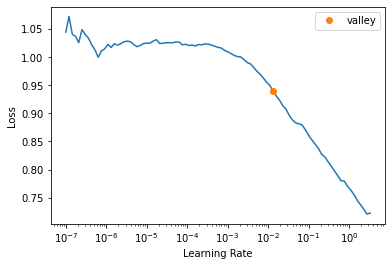

In [159]:
a=learn1.lr_find()

In [161]:
learn1.fit_one_cycle(5,a)

epoch,train_loss,valid_loss,accuracy,time
0,0.394064,0.423936,0.768427,00:09
1,0.381446,0.364920,0.834306,00:13
2,0.360380,0.356862,0.831081,00:13
3,0.362397,0.350730,0.839220,00:13
4,0.353965,0.349564,0.842752,00:12
